# Unlocking You Tube Channel Performance Secrets

# 1 Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

# 2 Load the Dataset

In [2]:
# Load the dataset
data = pd.read_csv("youtube_channel_real_performance_analytics.csv")
data

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,779.0,2024-08-25 00:00:00,10,25,8,2024,Sunday,0.806,4104.0,...,0.0,0.0,50.82,396.0,10018.0,1104.5703,16.0,8.063,97065.0,8.23
360,360,818.0,2024-09-01 00:00:00,7,1,9,2024,Sunday,1.050,3273.0,...,0.0,0.0,42.05,344.0,8298.0,793.6508,7.0,8.705,65912.0,9.36
361,361,2233.0,2024-09-16 00:00:00,15,16,9,2024,Monday,1.161,3605.0,...,0.0,0.0,31.48,703.0,8487.0,1657.8232,14.0,9.852,76517.0,8.28
362,362,391.0,2024-09-25 00:00:00,9,25,9,2024,Wednesday,0.547,2338.0,...,0.0,0.0,62.38,244.0,7060.0,479.5583,11.0,3.858,67091.0,8.29


In [3]:
data.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


# 3 Data Cleaning & Preprocessing

In [4]:
# Fill or drop null values
data = data.dropna() # Drop rows with missing values 

In [5]:
!pip install isodate

In [6]:
import pandas as pd
import isodate
import pandas as pd
import isodate

data = pd.DataFrame({'Video Duration': ['PT1H2M30S', 'PT45M', 'PT30S', None]})

data['Video Duration'] = data['Video Duration'].dropna().apply(
    lambda x: isodate.parse_duration(x).total_seconds() if pd.notna(x) else None)
 

In [7]:
# Drop missing rows for simplicity
data.dropna(inplace=True)

# Convert 'Video Duration'= data['Video Duration'].apply(lambdax:isodate.parse_duration(x).total_seconds())

# 4 Exploratory Data Analysis

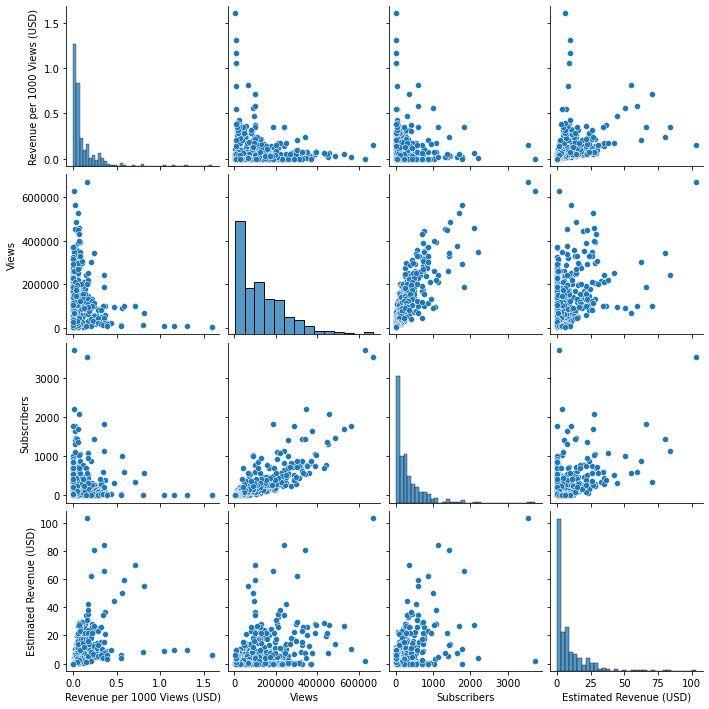

In [9]:
# Reload the original dataset
data = pd.read_csv("youtube_channel_real_performance_analytics.csv")

# Fill or drop null values in the original dataset
data = data.dropna()  # Drop rows with missing values 
# Pairplot to visualize relationships
sns.pairplot(data[['Revenue per 1000 Views (USD)', 'Views','Subscribers', 'Estimated Revenue (USD)']])
plt.show()

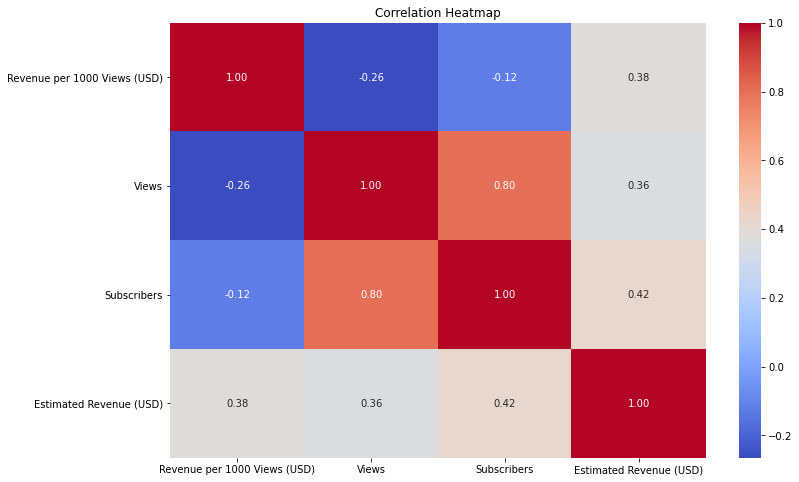

In [10]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[['Revenue per 1000 Views (USD)', 'Views','Subscribers', 'Estimated Revenue (USD)']].corr(),annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Top Performers by Revenue
top_videos = data.sort_values(by='Estimated Revenue (USD)', ascending=False).head(10)
display(top_videos[['ID', 'Estimated Revenue (USD)', 'Views', 'Subscribers']])

,ID,Estimated Revenue (USD),Views,Subscribers
228,228,103.117,670990.0,3538.0
257,257,83.979,241060.0,1125.0
251,251,80.265,343319.0,1437.0
289,289,70.247,99196.0,350.0
278,278,65.978,188324.0,1824.0
260,260,62.047,302999.0,866.0
293,293,59.058,101025.0,602.0
294,294,55.040,67556.0,581.0
290,290,50.344,89284.0,995.0
284,284,44.228,93487.0,305.0


# 5 Feature Engineering

In [12]:
import numpy as np

# Avoid division by zero
data['Revenue per View'] = np.where(data['Views'] > 0, data['Estimated Revenue (USD)'] / data['Views'], 0)

# Check if 'Comments' column exists, if not, create it with 0 values
if 'Comments' not in data.columns:
    data['Comments'] = 0  
# Now calculate Engagement Rate
data['Engagement Rate'] = np.where(data['Views'] > 0,
(data['Likes'] + data['Shares'] + data['Comments']) / data['Views'] * 100, 0)

# 6 Data Visualization

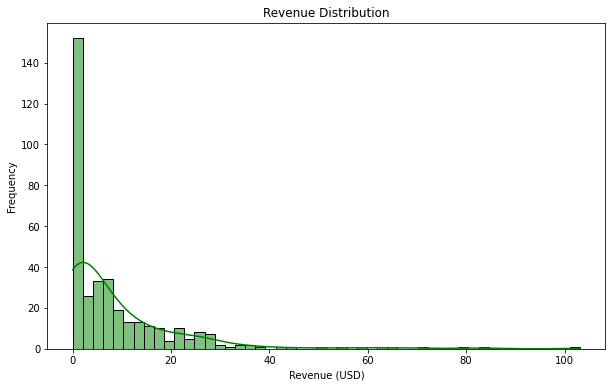

In [13]:
# Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Revenue (USD)'], bins=50, kde=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

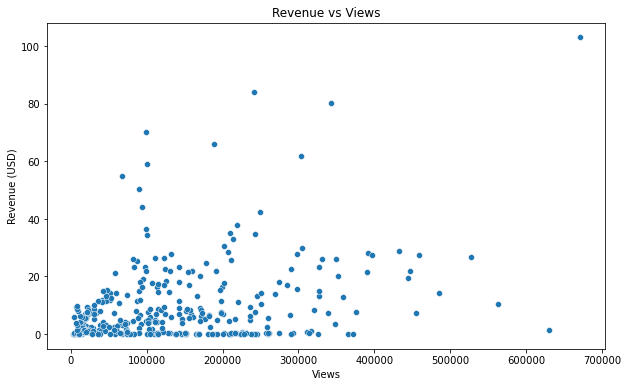

In [14]:
# Revenue vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Views'], y=data['Estimated Revenue (USD)'])
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Revenue (USD)")
plt.show()

# 7 Build Predective Model

In [15]:
# Define features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'Comments', 'Engagement Rate']
X = data[features]
y = data['Estimated Revenue (USD)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 8 Evalute Model

In [16]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 91.01
R-squared: -0.05


# 9 Insight & Export Model

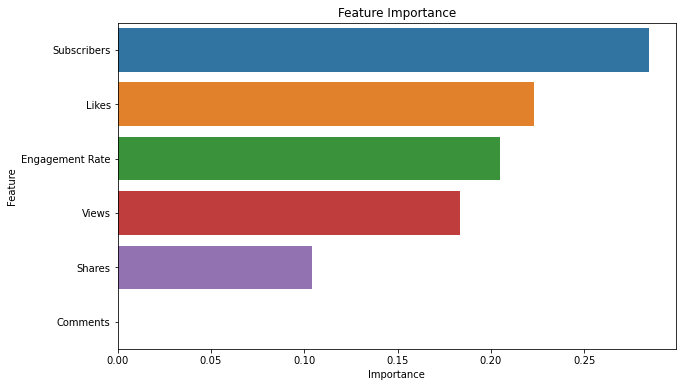

In [17]:
# Feature Importance
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance")
plt.show()